<a href="https://colab.research.google.com/github/Ranjith5720/Machine_Learning_Algorthms/blob/main/SVM_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### **Import Necessary Libraries :**

In [1]:
import numpy as np
import pandas as pd

#### **Data On-Boarding :**

In [2]:
# Upload raw data

from google.colab import files
data = files.upload()

Saving svm_Exercise.csv to svm_Exercise.csv


In [3]:
# convert raw data to dataframe

df = pd.read_csv('svm_Exercise.csv')
df

,gender,married,ch,income,loanamt,status
0,Male,No,1.0,5849,NaN,Y
1,Male,Yes,1.0,4583,128.0,N
2,Male,Yes,1.0,3000,66.0,Y
3,Male,Yes,1.0,2583,120.0,Y
4,Male,No,1.0,6000,141.0,Y
...,...,...,...,...,...,...
609,Female,No,1.0,2900,71.0,Y
610,Male,Yes,1.0,4106,40.0,Y
611,Male,Yes,1.0,8072,253.0,Y
612,Male,Yes,1.0,7583,187.0,Y


#### **Data Preprossing :**
**Exploratary Data Analysis : ( EDA )**


In [4]:
# find total no. of rows & columns

df.shape

(614, 6)

In [5]:
# find all column names

df.columns

Index(['gender', 'married', 'ch', 'income', 'loanamt', 'status'], dtype='object')

In [6]:
# find first five rows in the dataframe

df.head()

,gender,married,ch,income,loanamt,status
0,Male,No,1.0,5849,NaN,Y
1,Male,Yes,1.0,4583,128.0,N
2,Male,Yes,1.0,3000,66.0,Y
3,Male,Yes,1.0,2583,120.0,Y
4,Male,No,1.0,6000,141.0,Y


In [7]:
# find last five rows in the dataframe

df.tail()

,gender,married,ch,income,loanamt,status
609,Female,No,1.0,2900,71.0,Y
610,Male,Yes,1.0,4106,40.0,Y
611,Male,Yes,1.0,8072,253.0,Y
612,Male,Yes,1.0,7583,187.0,Y
613,Female,No,0.0,4583,133.0,N


In [8]:
# find all informations about the dataframe

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   gender   601 non-null    object 
 1   married  611 non-null    object 
 2   ch       564 non-null    float64
 3   income   614 non-null    int64  
 4   loanamt  592 non-null    float64
 5   status   614 non-null    object 
dtypes: float64(2), int64(1), object(3)
memory usage: 28.9+ KB


In [9]:
# find descriptive statistical analysis

df.describe()

,ch,income,loanamt
count,564.000000,614.000000,592.000000
mean,0.842199,5403.459283,146.412162
std,0.364878,6109.041673,85.587325
min,0.000000,150.000000,9.000000
25%,1.000000,2877.500000,100.000000
50%,1.000000,3812.500000,128.000000
75%,1.000000,5795.000000,168.000000
max,1.000000,81000.000000,700.000000


In [10]:
# find total no. of missing values in the dataframe

df.isnull().sum(axis=0)

gender     13
married     3
ch         50
income      0
loanamt    22
status      0
dtype: int64

#### **Data Cleaning :**

In [11]:
# shallow copy of the dataframe

df_copy = df.copy()

In [12]:
# clear missing value rows in the dataframe

df_clear = df_copy.dropna()
df_clear

,gender,married,ch,income,loanamt,status
1,Male,Yes,1.0,4583,128.0,N
2,Male,Yes,1.0,3000,66.0,Y
3,Male,Yes,1.0,2583,120.0,Y
4,Male,No,1.0,6000,141.0,Y
5,Male,Yes,1.0,5417,267.0,Y
...,...,...,...,...,...,...
609,Female,No,1.0,2900,71.0,Y
610,Male,Yes,1.0,4106,40.0,Y
611,Male,Yes,1.0,8072,253.0,Y
612,Male,Yes,1.0,7583,187.0,Y


In [13]:
# clear irrelevant columns in the dataframe

df_clear = df_clear.drop(['gender'],axis=1)

In [14]:
df_clear

,married,ch,income,loanamt,status
1,Yes,1.0,4583,128.0,N
2,Yes,1.0,3000,66.0,Y
3,Yes,1.0,2583,120.0,Y
4,No,1.0,6000,141.0,Y
5,Yes,1.0,5417,267.0,Y
...,...,...,...,...,...
609,No,1.0,2900,71.0,Y
610,Yes,1.0,4106,40.0,Y
611,Yes,1.0,8072,253.0,Y
612,Yes,1.0,7583,187.0,Y


#### **Label Encoding :**

In [15]:
# label encoding using get dummies method

df_clear = pd.get_dummies(df_clear,drop_first=True)

In [16]:
df_clear

,ch,income,loanamt,married_Yes,status_Y
1,1.0,4583,128.0,1,0
2,1.0,3000,66.0,1,1
3,1.0,2583,120.0,1,1
4,1.0,6000,141.0,0,1
5,1.0,5417,267.0,1,1
...,...,...,...,...,...
609,1.0,2900,71.0,0,1
610,1.0,4106,40.0,1,1
611,1.0,8072,253.0,1,1
612,1.0,7583,187.0,1,1


#### **X & Y Split :**

In [17]:
# separate the independent variables in the dataframe

x = df_clear.drop(['status_Y'],axis=1)
x

,ch,income,loanamt,married_Yes
1,1.0,4583,128.0,1
2,1.0,3000,66.0,1
3,1.0,2583,120.0,1
4,1.0,6000,141.0,0
5,1.0,5417,267.0,1
...,...,...,...,...
609,1.0,2900,71.0,0
610,1.0,4106,40.0,1
611,1.0,8072,253.0,1
612,1.0,7583,187.0,1


In [18]:
# separate the dependent variable in the dataframe

y = df_clear['status_Y']
y

1      0
2      1
3      1
4      1
5      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: status_Y, Length: 529, dtype: uint8

#### **Train & Test Split :**

In [19]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.3, random_state= 7, stratify= y)

In [20]:
x_train.shape

(370, 4)

In [21]:
x_test.shape

(159, 4)

In [22]:
y_train.shape

(370,)

In [23]:
y_test.shape

(159,)

#### **Model Building :**
**Support Vector Mechine : ( SVM - Classifier )**
- It is used to Supervised Learning models to solve Classification, Regression and Outlier detection problems.
- It is a Binary Classifier.



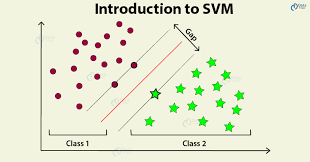

In [24]:
from sklearn.svm import SVC
svc = SVC()

In [25]:
# train the model

svc.fit(x_train,y_train)

SVC()

In [26]:
# predict the value

y_predict = svc.predict(x_test)
y_predict

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1], dtype=uint8)

#### **Model Evaluation :**

In [27]:
from sklearn.metrics import confusion_matrix

In [28]:
cm = confusion_matrix(y_test,y_predict)
cm

array([[  0,  49],
       [  1, 109]])